In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_iris = pd.read_csv(r"C:\Users\91998\OneDrive\Assignments\Deep_Learning\iris_modified.csv")
df_iris.head()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species
0,0,5.1,3.5,1.4,0.2,setosa
1,1,4.9,3.0,1.4,0.2,setosa
2,2,4.7,3.2,1.3,0.2,setosa
3,3,4.6,3.1,1.5,0.2,setosa
4,4,5.0,3.6,1.4,0.2,setosa


In [3]:
df_iris.drop(columns="Unnamed: 0",axis=1, inplace=True)

In [4]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  100 non-null    float64
 1   sepal_width   100 non-null    float64
 2   petal_length  100 non-null    float64
 3   petal_width   100 non-null    float64
 4   species       100 non-null    object 
dtypes: float64(4), object(1)
memory usage: 4.0+ KB


In [6]:
df_iris["species"].value_counts()

setosa        50
versicolor    50
Name: species, dtype: int64

C:\Users\91998\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


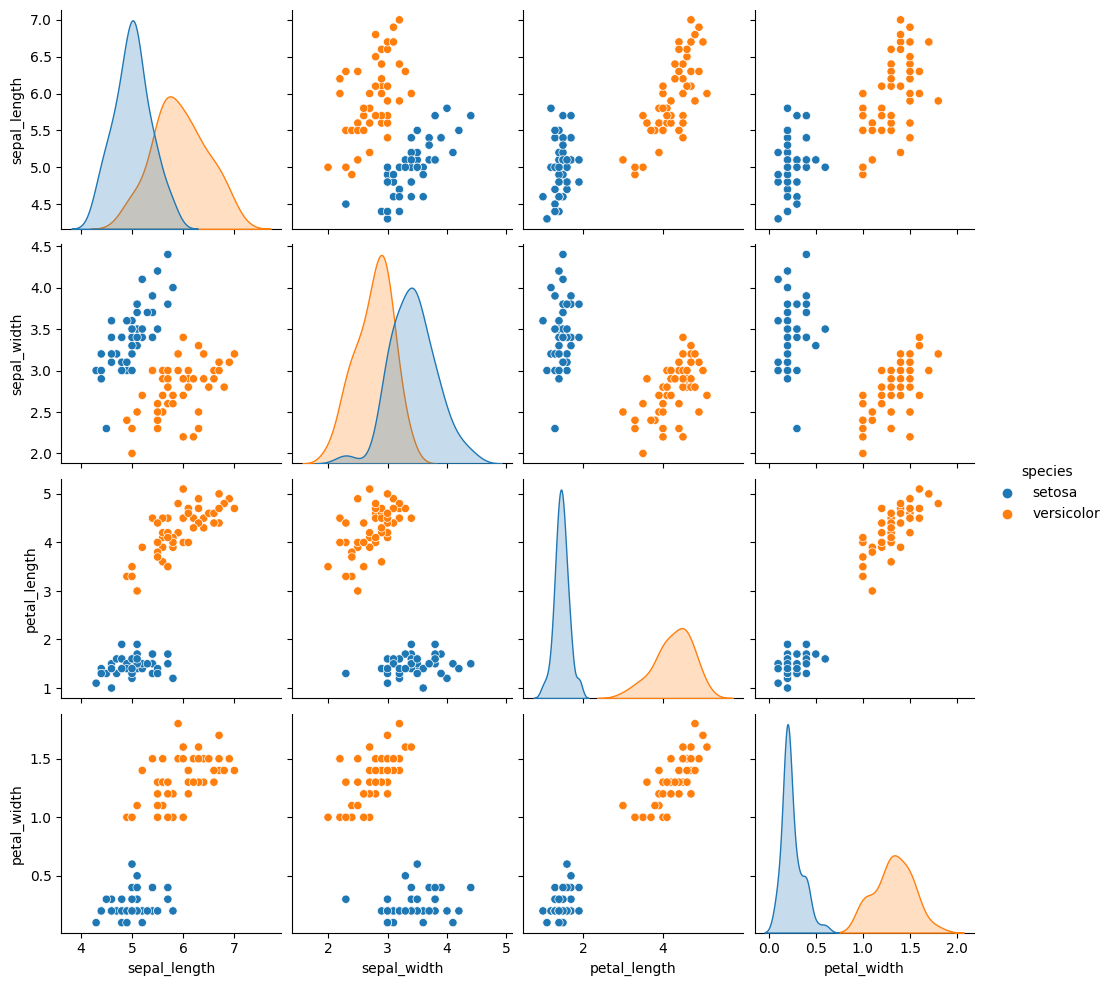

In [7]:
sns.pairplot(df_iris, hue='species')

### Observation:

#### It looks like I don't have to consider all 4 variables to build my model. I can consider either one of the following pair:

- PetalLength and SepalLength
- PetalLength and SepalWidth
- PetalLength and PetalWidth
- PetalWidth and SepalLength

In [ ]:
### Using Perceptron Trick

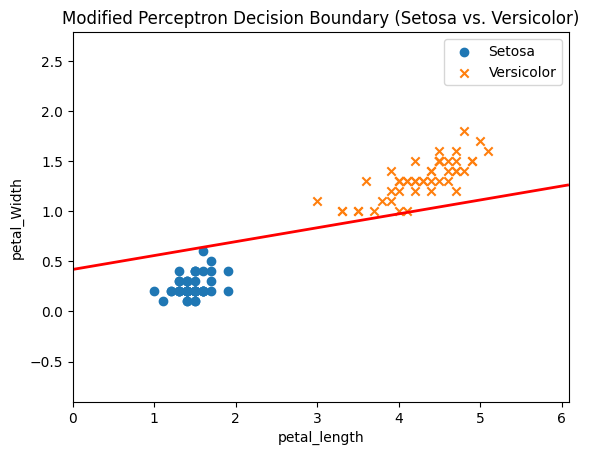

In [8]:
# Convert the species column to binary labels
df_iris['species'] = df_iris['species'].map({'setosa': 0, 'versicolor': 1})

# Extract features and labels
X = df_iris[['petal_length', 'petal_width']].values
y = df_iris['species'].values

# Initialize weights randomly between 0 and 1
w = np.random.rand(X.shape[1])
b = 1

# Define learning rate
learning_rate = 0.01

# Perceptron training
for iteration in range(100):
    random_indices = np.random.choice(len(X), size=len(X), replace=False)
    X_shuffled = X[random_indices]
    y_shuffled = y[random_indices]
    
    for i in range(len(X_shuffled)):
        xi = X_shuffled[i]
        yi = y_shuffled[i]
        activation = np.dot(xi, w) + b
        if activation >= 0:
            prediction = 1
        else:
            prediction = 0
        if prediction != yi:
            # Misclassification
            if yi == 0:
                # True class is 0, subtract coordinates from weights
                w -= learning_rate * xi
            else:
                # True class is 1, add coordinates to weights
                w += learning_rate * xi
            b += learning_rate * (yi - prediction)

# Plotting the dataset
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Setosa', marker='o')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Versicolor', marker='x')

# Plot the decision boundary (separator line)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], w) + b
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red')

plt.xlabel('petal_length')
plt.ylabel('petal_Width')
plt.legend()
plt.title('Modified Perceptron Decision Boundary (Setosa vs. Versicolor)')
plt.show()